<a href="https://colab.research.google.com/github/anujashende/Yes-Bank-Stock-Price/blob/main/Yes_Bank_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Prices**    - 



####   **Project Name** -  **Yes Bank Stock Prices**
#####  **Project Type**    - **Regression**
##### **Contribution**    - **Team**
##### **AMISHA KAPSE**
##### **ANUJA SHENDE**
##### **RENUKA JADHAV**
##### **SHUBHAM PAPADKAR**

# **Project Summary -**

A time series model is a statistical method that utilizes past data points to forecast future values, it can be applied to predict the closing price of a stock for the month. This technique can be used to examine the stock's behavior and make a knowledgeable decision regarding its future. By utilizing this model, it is possible to identify trends in the stock's historical prices and predict future prices. Additionally, indicators such as moving averages, Bollinger Bands, and MACD can be employed to enhance predictions, and external factors such as news, economic data, and other relevant information can be incorporated to achieve more accurate predictions.

# **GitHub Link -** https://github.com/anujashende

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month  by creating a machine learning regression model with best accuracy score. 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math
from xgboost import XGBRegressor

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.metrics import *
# Remove Warnings.
import warnings
warnings.filterwarnings('ignore')


### **Dataset Loading**

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ capstone project 2 Yes bank stock prices/data_YesBank_StockPrices.csv')

### **Dataset First View**

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# **Dataset Last Look**

In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### **Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count
len(df.columns)



5

In [ ]:
len(df.values)


185

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


From above we can conclude that:

1. The shape of our dataset is 185 rows and 5 columns

2. Datatype of Date is given as object which we need to change that to DateTime

3. Yes bank stock listed on month of july 2005.We have data available from july 2005 to november 2020

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# In our Dataset their is no missing values.

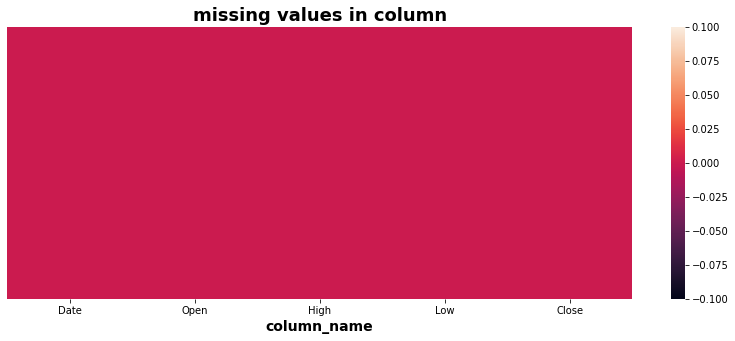

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=18)
plt.show()

### What did you know about your dataset?



*   The time period of Dataset in Between July 2005 to Nov 2020.

*   We have total 185 Rows and 5 Columns.

*   In our Dataset no duplicate and missing values.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
# Summary of the Categorical features
df.describe(include='object')

,Date
count,185
unique,185
top,Jul-05
freq,1


### Variables Description 


**Date:** It denotes the month & year with respect to the price of the stock.

**Open:** The price at which a stock started trading that month.

**High:** Refers to the maximum price of the stock.

**Low:** Refers to the minimum price of the stock.

**Close:** Refers to the final trading price for that month.

**'Close' is the dependent variable in this case as we are going to predict the closing price of the stock**




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df['Date'].nunique()

185

In [ ]:
df['Open'].nunique()

183

In [ ]:
df['High'].nunique()

184

In [ ]:
df['Low'].nunique()

183

In [ ]:
df['Close'].nunique()

185

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
Features = df[["Open",'High','Low']]
Target = df['Close']

In [ ]:
# Write your code to make your dataset analysis ready.
df=df.copy()
# Checking Shape of True Value
print("stock closing price  : -",len(df[df['Close']==True]))
# Assigning churn customers data to variable df_churn
df_churn=df[(df['Close']==True)]

stock closing price  : - 0


# **convert string object to datetime object**

In [ ]:
# convert string object to datetime object
from datetime import datetime
# For analysis we want date in 'DD-MM-YYYY' formate
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y')))

In [ ]:
df['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [ ]:
#setting Date column as index
df.set_index('Date',inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


### What all manipulations have you done and insights you found?

Changing date of column datatype to datetime format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

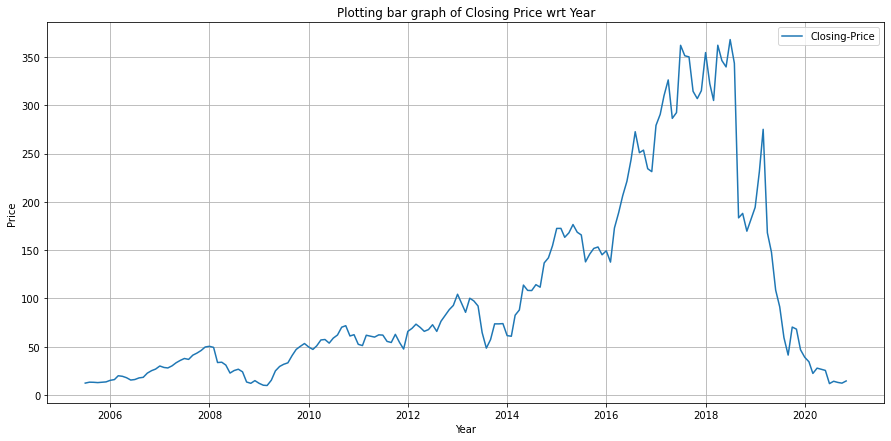

In [ ]:
# Visualize closing orice is changing with respect to year
plt.figure(figsize=(15,7))
plt.plot(df['Close'])
plt.legend(['Closing-Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Plotting bar graph of Closing Price wrt Year')
plt.grid()
plt.show()


##### 1. Why did you pick the specific chart?

Here we cans see that the stocks were high from 2017 to 2018 but it dropped after 2018 because of fraud case regarding to Rana kapoor.

We can see in 2017 to 2019 there can be high action seen because of difference in high and low lines.

We can take closing price of the stock as the dependent variable as it is the final price of that day

##### 2. What is/are the insight(s) found from the chart?

The graph shows the highest price of YES BANK stocks in the year 2018. 
After the year 2018. 

After the year 2018,we see a gradual fall in a stocks price. 

After the year 2016, we see a rapid increase in a stocks price.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes ,the insights can help in creating a positive impact , as we can see the stock price from 2005 to 2018 which was a beneficial time for investor after ther was down in the stock price.

#### Chart - 2

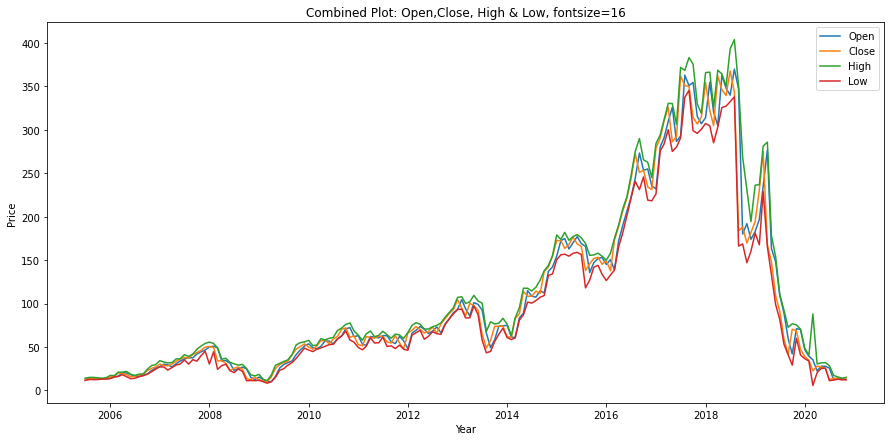

In [ ]:
# Lets visualize close, open, low and high in combined line plot.
plt.figure(figsize=(15,7))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend(['Open', 'Close',"High",'Low'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Combined Plot: Open,Close, High & Low, fontsize=16')
plt.show()

##### 1. Why did you pick the specific chart?

--All the prices shows almost similar trends with each other.

-- Which means that this features may be strongly correlated with each other.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we can see that there was a good price rise from July 2005 till 2018 and it was a good time to invest as there was an up trend. The price was between 5 Rs - 10 Rs in around July 2005 and reached a peak price of above 350 Rs in the year 2018. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in creating a positive business impact, as we can see the up trend in the stock price from July 2005 to 2018 which was a beneficial time for the investor and after Rana Kapoor fraud there was downtrend in the stock price.

**Distribution of dependant variable i.e Close Price of stock.**

Text(0.5, 1.0, '')

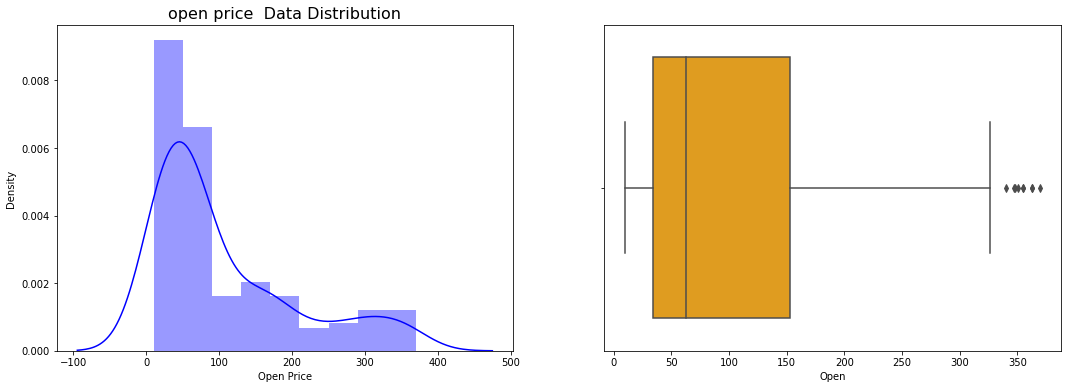

In [ ]:
# Lets see the open price  Data Distribution
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df['Open'], color='blue')
plt.title("open price  Data Distribution", fontsize=16)
fig.set_ylabel('Density ')
fig.set_xlabel('Open Price')

plt.subplot(1, 2, 2)
fig = sns.boxplot(df['Open'],color='orange')
fig.set_title('')
     

##### 1. Why did you pick the specific chart?

Density plots are used to display the probability density function of a continuous random variable and provide insights into the underlying distribution of a dataset. They can be useful for identifying patterns and trends in the data, comparing different groups and visualizing non-normal distributions.

##### 2. What is/are the insight(s) found from the chart?



From above density chart its conclude that the opening price was in the range of 40Rs to 150Rs with the highest point that up to 60Rs and The outliers price range differing up to the 350Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, from above density chart we conclude that, its beneficial for creating a positive business impact.


```


#### Chart - 4

Text(0.5, 1.0, '')

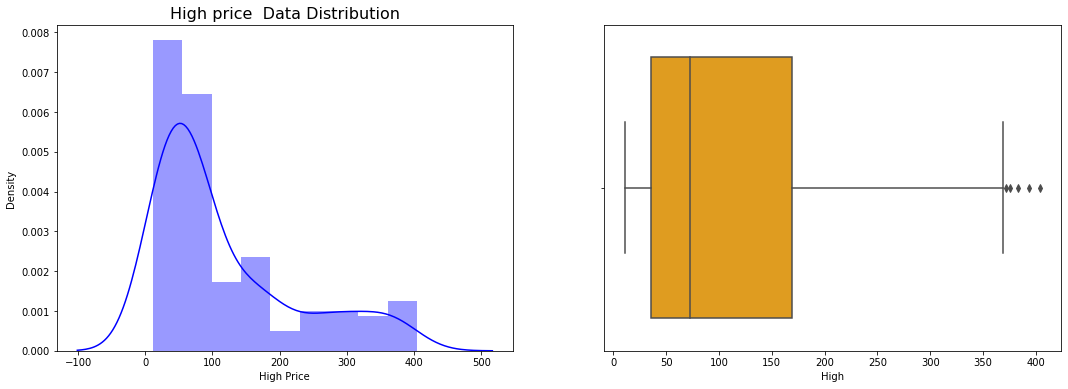

In [ ]:
 # Lets see the High price  Data Distribution

plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df['High'], color='blue')
plt.title('High price  Data Distribution', fontsize=16)
fig.set_ylabel('Density ')
fig.set_xlabel('High Price')

plt.subplot(1, 2, 2)
fig = sns.boxplot(df['High'], color='orange')
fig.set_title('')

##### 1. Why did you pick the specific chart?

Above chart was picked for better understanding of the density distribution visualisation of the highest price of the month and Visulazing outliers.

##### 2. What is/are the insight(s) found from the chart?

By understanding the above chart we can say that density of YES BANK stock high price is at highest between 5Rs to 60Rs price range and the density keeps reducing after 80Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Density of high price in the YES BANK stocks price suggest that there is high likelihood that it will rich a high between 5Rs and 60Rs and that it will be unlikely to rich a high over 100Rs. 

#### Chart - 5

Text(0.5, 1.0, '')

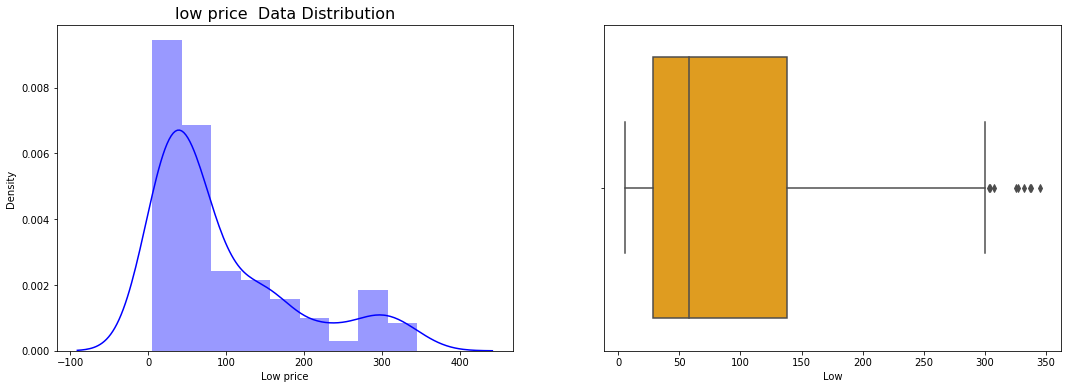

In [ ]:
# Lets see the low price  Data Distribution

plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df['Low'], color='blue')
plt.title("low price  Data Distribution", fontsize=16)
fig.set_ylabel('Density ')
fig.set_xlabel('Low price')

plt.subplot(1, 2, 2)
fig = sns.boxplot(df['Low'],color='orange')
fig.set_title('')

##### 1. Why did you pick the specific chart?

Above chart was picked for better understanding of the density distribution visualisation of the lowest price of the month and Visulazing outliers.



##### 2. What is/are the insight(s) found from the chart?

By understanding the above chart we can say that the frequency of YES BANK stock at low prices is most concentrated in the range of 5Rs to 60Rs, with a decrease in frequency as the price exceeds 100Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

  By understanding the above chart we can say thatsThe density of low prices for YES BANK stock indicates a higher probability of the stock closing in the range of 5Rs to 60Rs and a lower probability of it closing at a price higher than 100Rs.

#### Chart - 6

Text(0.5, 1.0, '')

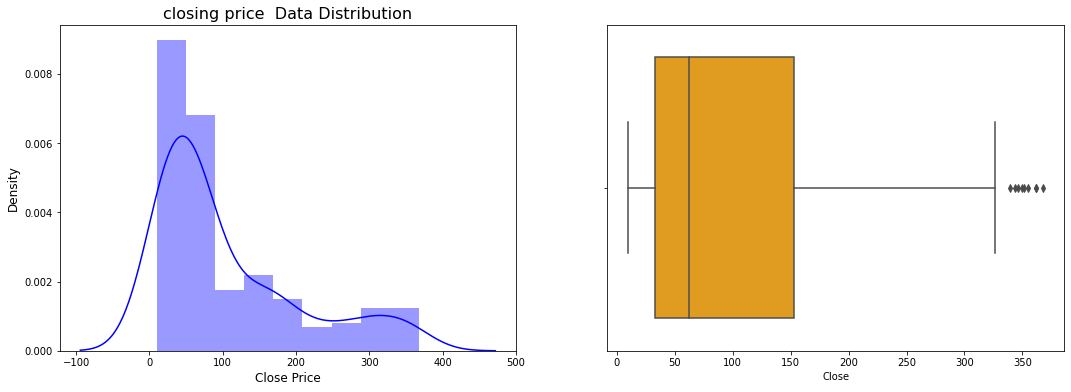

In [ ]:
# Lets see the closing price  Data Distribution

plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df['Close'], color='blue')
plt.title('closing price  Data Distribution', fontsize=16)
fig.set_ylabel('Density',fontsize=12)
fig.set_xlabel('Close Price',fontsize=12)

plt.subplot(1, 2, 2)
fig = sns.boxplot(df['Close'],color='orange')
fig.set_title('')

It is rightly skewed distribution.

need to go with log transformation to make it normal distribution

##### 1. Why did you pick the specific chart?

Density plots are useful for visualizing the distribution of closing prices for a stock. By plotting the density of closing prices over time, patterns and trends in the data can be identified, such as a high frequency of closing prices within a certain range or a shift in the distribution over time. This can provide valuable insights into the performance of the stock and inform decision making related to investing.

##### 2. What is/are the insight(s) found from the chart?

From the density chart of closing prices, it can be inferred that the closing price of YES BANK stock was mostly concentrated in the range of 40Rs to 150Rs, with the highest point at around 60Rs. Additionally, there may be some outliers, or very rare instances, where the closing price was in the range of 350Rs. This information can provide insights into the general performance of the stock and inform decisions related to investing in the stock.

#### Chart - 7

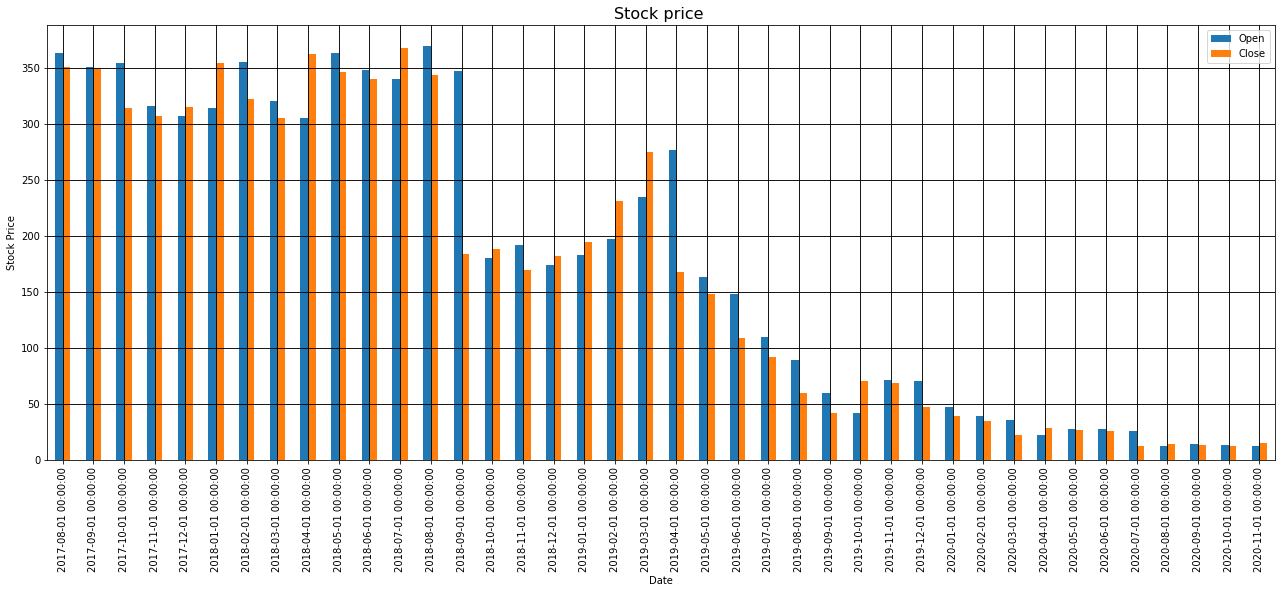

In [ ]:
# Chart - 7 visualization
df[['Open','Close']].tail(40).plot(kind='bar',figsize=(22,8))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='black')
plt.title('Stock price ', fontsize=16)
plt.ylabel("Stock Price")
plt.xlabel("Date")
plt.show()

##### 1. Why did you pick the specific chart?

the chart appears to show a relationship between the opening price (represented by the blue bar) and the closing price (represented by the orange bar) of a particular asset or security over a specific period of time (likely a month). It's important to note that the relationship shown in the chart may not necessarily be causal, and there could be other factors influencing the opening and closing prices.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that the opening price peaked above 350Rs in August 2017, September 2017, October 2017, February 2018, May 2018, and August 2018, while the closing price reached its peak above 350Rs in August 2017, January 2018, April 2018, and July 2018. Additionally, both opening and closing prices were the lowest during August 2020, September 2020, October 2020, and November 2020.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart can be used to make informed decisions by identifying patterns, such as a period of low prices from August 2020 to November 2020, which may be avoided for investing. However, it's important to consider other factors and historical performance is not a guarantee of future results.

#### Chart - 8 **Scatter Plot to see the Best Fit line**

**Best Fit Line**:- A line of best fit is a straight line that is the best  approximation of the given set of data. It is used to study the nature of the relation between two variables.

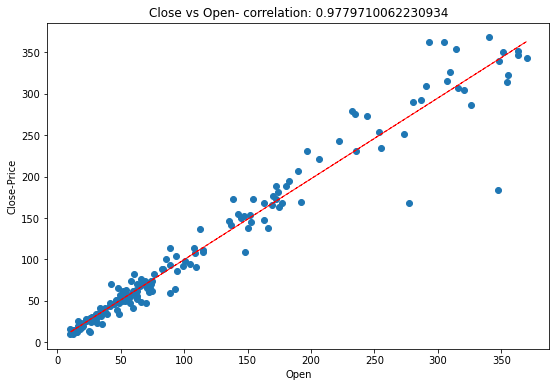

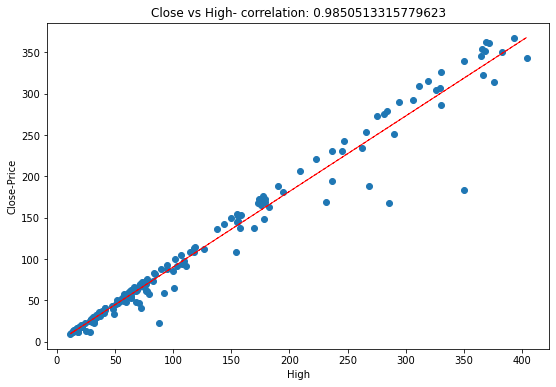

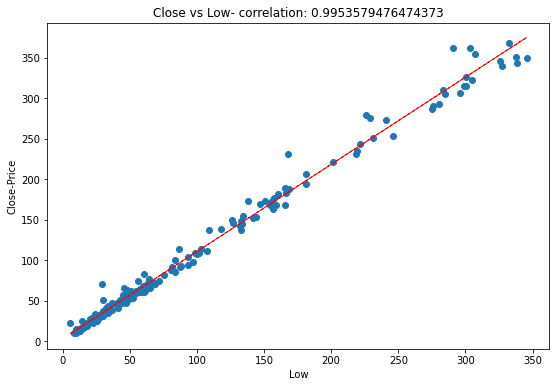

In [ ]:
# Now lets look for relation independent variables with dependent variable.
for col in Features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close-Price')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Close'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

 Close-Open
Close-High Close- Low Here we selected 3 charts to understand the correlation between Close price and Open price, Close price and High price, Close price and Low price.

##### 2. What is/are the insight(s) found from the chart?

All three charts show a positive correlation. Close-Open chart has a correlation of 0.9779 Close-High chart has a correlation of 0.9850 Close-Low chart has a correlation of 0.9953 The chances of stock price closing at low are higher than compared to opening price.






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart illustrates the highs and lows prices over a specific period of time, providing valuable insights into patterns and trends that can be used to make informed decisions, such as avoiding a period of consistently low prices for investing. However, it is important to note that historical performance is not necessarily indicative of future results.

#### Chart - 10 - Correlation Heatmap

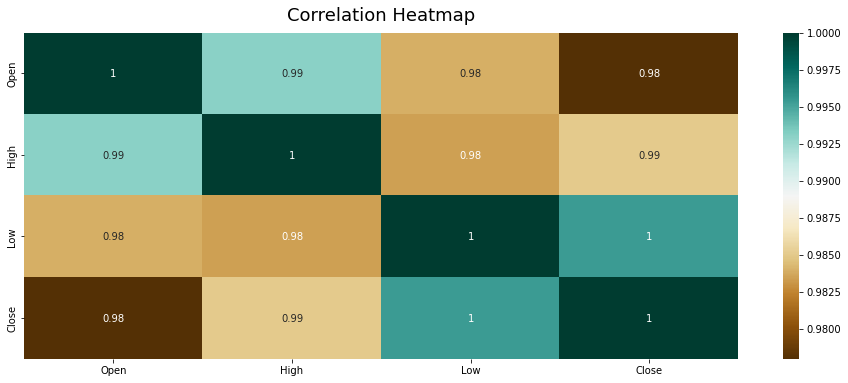

In [ ]:
# Correlation Heatmap visualization code
corr=df.corr()
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(corr, annot = True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);



     

##### 1. Why did you pick the specific chart?

There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)

so, we can decide which varible we should keep in our analysis and predicting model and which should be removed from the datasets.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that low and close prices have the strongest relationship, followed by high and close, and least strong is between open and close prices.

#### Chart - 15 - Pair Plot 

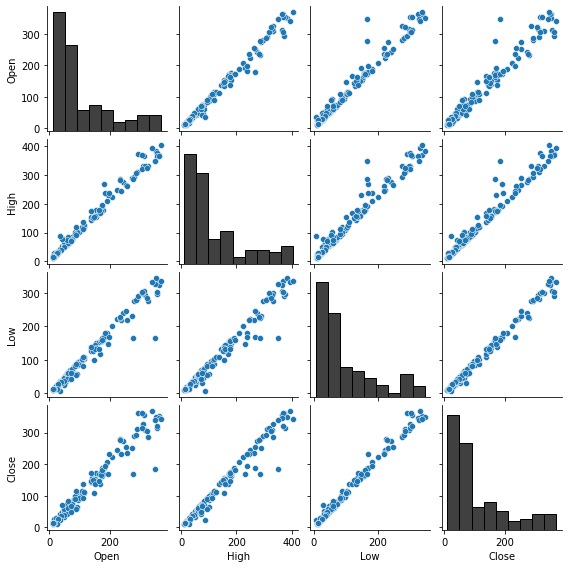

In [ ]:
# Pair Plot for each categorical feature count
sns.pairplot(df, height=2, diag_kws={'color':'black'})
         

##### 1. Why did you pick the specific chart?

Seaborn Pairplot is a visualization tool that plots pairwise relationships between variables in a dataset. It creates a matrix of scatter plots and histograms/KDE plots, helping to identify patterns and relationships in the data.

## ***6. Feature Engineering & Data Pre-processing***

Outlier Detection 

### 2. Handling Outliers

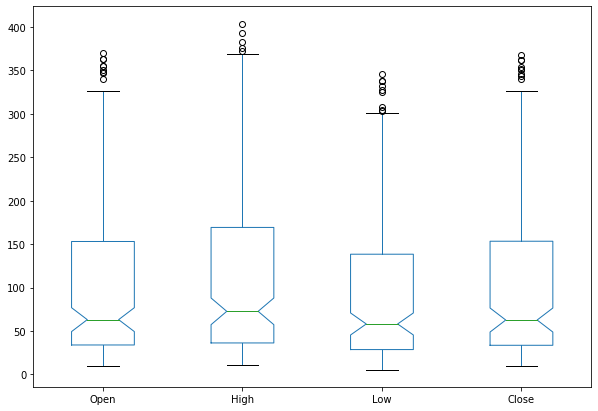

In [ ]:
# Handling Outliers & Outlier treatments
fig = plt.figure(figsize =(10, 7))
boxplot = df.boxplot(column=['Open','High','Low',"Close"],grid=False,notch=True)
plt.show()
 


     

##### What all outlier treatment techniques have you used and why did you use those techniques?

As above boxplot shows outliers this is because of stock price fall from nearly around 400 to 20.This happen quick within very few months thats why top value of stocks looks like outliers.

Conclusion:

1. There are no duplicates present
2. There are no null values present
3. Columns in dataset are Date,Open,High,Low,Close
Data Type Correction

### 4. Feature Manipulation & Selection

# #### 1. **Feature Selection**

**VIF**:- The Variance Inflation Factor (VIF) measures the severity of multicollinearity in regression analysis. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.

In [ ]:
# Select your features wisely to avoid overfitting

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


##### What all feature selection methods have you used  and why?

Variance Inflation Factor method

##### Which all features you found important and why?

Even though we have high VIF scores, we will not perform feature engineering because for this particular case as each feature is important. In the real world, most indicators take into account each of these features to predict future values.

We have very high VIF in our dataset so, we have to drop one them which is least correlated with dependent variable.

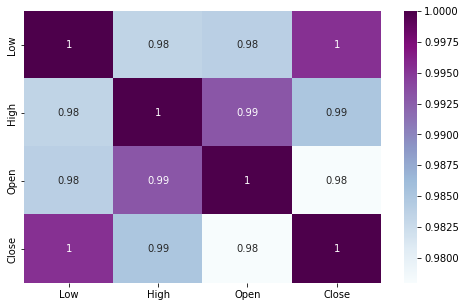

In [ ]:
#Lets find correlation with heatmap
plt.figure(figsize=(8,5))
correlation = df[['Low','High','Open','Close']].corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')
     

In general case, Any variable having VIF above 5 is considered to be multicollinear.


The thumb rule is to drop the highest VIF variable. 

However, you may choose to select the variable to be dropped based on business logic


Here all feature are equally important and we have very limited features.

### 5. **Data Transformation**

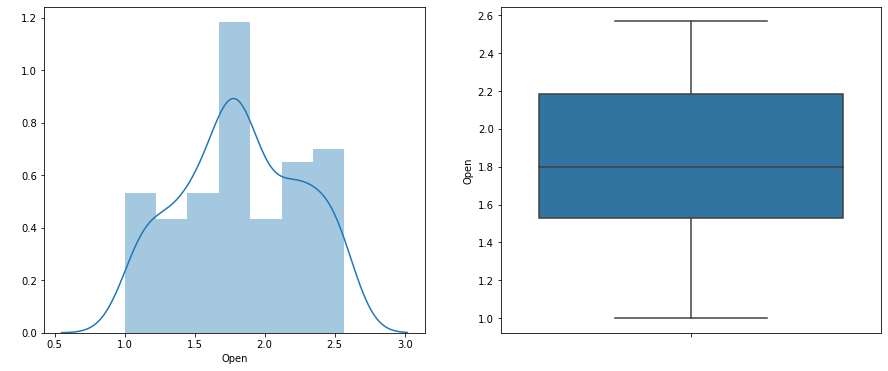

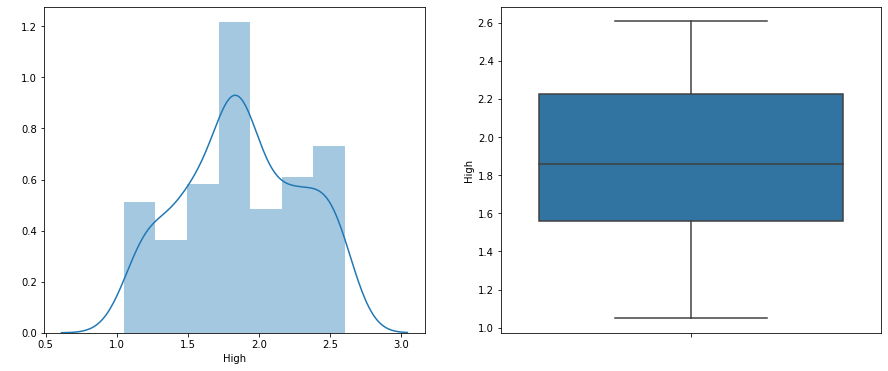

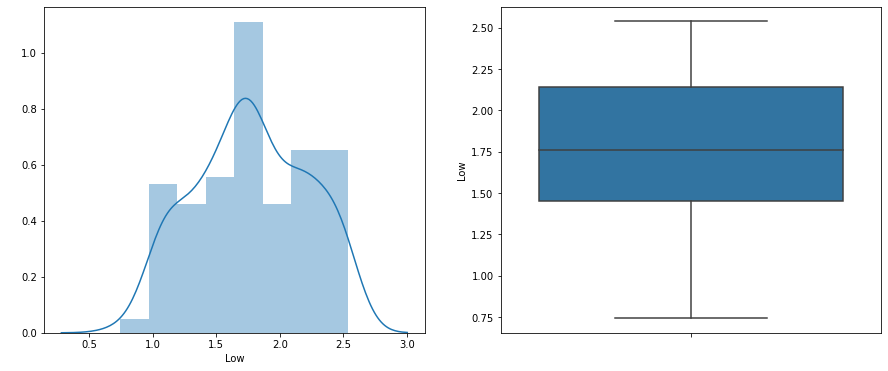

In [ ]:
# Applying log transformation in order to normalize the features.
for var in Features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df[var]))
    fig.set_title('')
    fig.set_ylabel(var)



-Now looks like normally distrubuted !!!

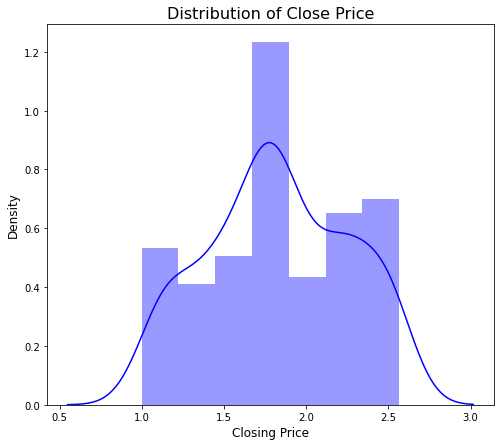

In [ ]:
# Applying log transformation in order to normalize the features.
plt.figure(figsize=(8,7))
sns.distplot(np.log10(df['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

I have used log10 transformation as it was positively skewed.Now it seems more normal

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Because of the data being moderately right skewed we will be using log transformation for normal distribution.

X = Independant Variable values

y = Dependent Variable values

In [ ]:
#from scipy.stats import zscore
#Using Log transformation
independent_var = ['Open','High','Low']
x = np.log10(df[independent_var])

In [ ]:
y = np.log10(df['Close'])

###  **Data Splitting**

**Train(80%) & Test(20%) Split**

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


**What data splitting ratio have you used and why?**


We used Train test split. A split of 80-20 % is done on Trian and Test respectively, beacuse its considered to be optimum split.

## *** ML Model Implementation***



### **ML Model 1 - Linear Regression**

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

In [ ]:
# implementing Linear_regression model
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
# Fit the Algorithm
reg = LinearRegression().fit(X_train, y_train)
# Predict on the model
reg.score(X_train, y_train)

0.9947900553430551

In [ ]:
reg.coef_

array([-0.54870728,  0.82607147,  0.72696515])

In [ ]:
y_pred = reg.predict(X_test)

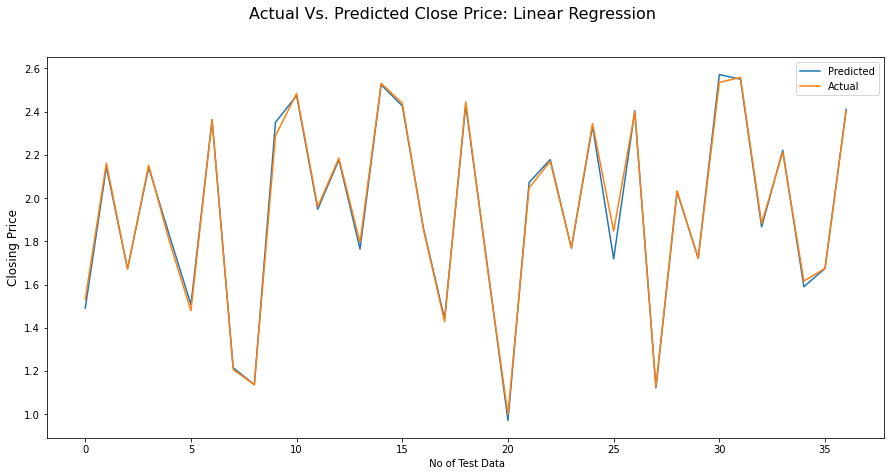

In [ ]:
# visualizing actual vs predicted
plt.figure(figsize=(15,7))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(["Predicted","Actual"])
plt.xlabel(' No of Test Data')
plt.ylabel('Closing Price', fontsize=12)
plt.show()

**Evaluation Metrics of Linear Regression**:-

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 70.4204061614549
RMSE : 8.391686729225235
R2 : 0.9937436908107393
Adjusted R2 :  0.9931749354298974


Linear regression is giving about 99% correct prediction.

It's r2 score is 0.99 which is very good.

**ML Model - 2 Using LASSO REGRESSION**


In [ ]:
# implementing lasso_regression model
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.6790589204250228

In [ ]:
y_pred_l = lasso.predict(X_test)

1. **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8552.042520593579
RMSE : 92.47725407143953
R2 : 0.24021707449589957
Adjusted R2 :  0.1711458994500723


#### 2. **Cross- Validation & Hyperparameter Tuning**

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

The three steps involved in cross-validation are as follows :

1.Reserve some portion of sample data-set.

2.Using the rest data-set train the model.

3.Test the model using the reserve portion of the data-set.#

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_1 = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)
# Fit the Algorithm

# Predict on the model
     
     

GridSearchCV(cv=3, estimator=Lasso(alpha=0.1, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.001303609483074943


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

Lasso Regression After Validation: Actual Vs. Predicted

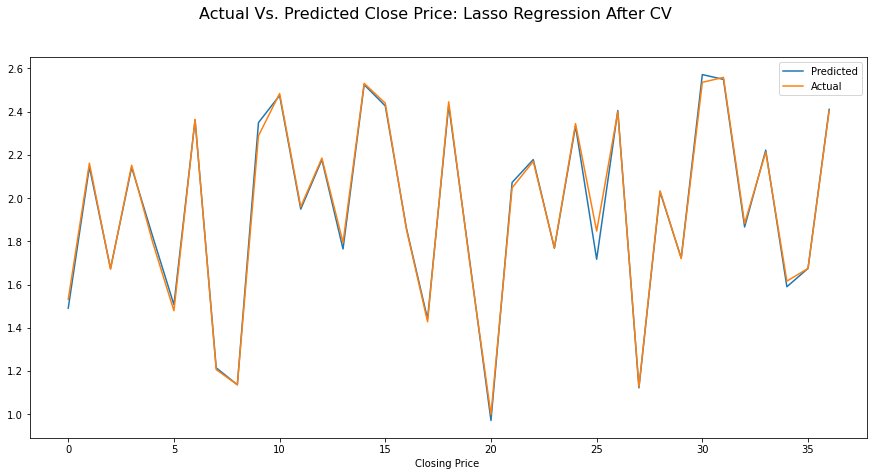

In [ ]:
# visualizing actual vs predicted
plt.figure(figsize=(15,7))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(["Predicted","Actual"])
plt.xlabel(' No of Test Data')
plt.xlabel('Closing Price ')
plt.show()

1.Which hyperparameter optimization technique have you used and why?

We have used Cross validation and hyper parameter tuning for avoiding overfiting of the model lasso and better accuracy on test data.

2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement is seen beacuse of the less accuracy than our first model.

### ML Model - 3 **Ridge regression**

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
# Fit the Algorithm
ridge.fit(X_train,y_train)
print(ridge.score(X_train, y_train))
# Predict on the model
y_pred_r = ridge.predict(X_test)

0.9937372031772778


#### 1. **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 84.54874728831831
RMSE : 9.195039276061756
R2 : 0.9924884968230997
Adjusted R2 :  0.9918056328979269


In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0013085591570528594


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

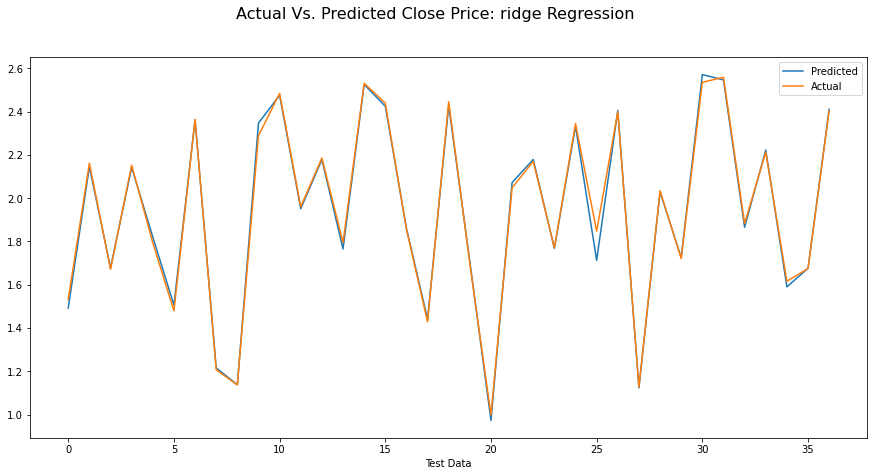

In [ ]:
#Visualizing actual values and predicted values
plt.figure(figsize=(15,7))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.suptitle('Actual Vs. Predicted Close Price: ridge Regression', fontsize=16)
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()

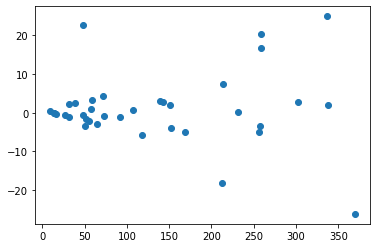

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_r),10**(y_test)-10**(y_pred_r))

In [ ]:
10**(y_pred)

array([ 30.99022321, 139.52578767,  47.20003592, 138.76152873,
        66.37639853,  32.206864  , 230.16454023,  16.42303081,
        13.71334173, 224.1008932 , 298.51460785,  88.88870295,
       150.66523923,  58.19270977, 334.91417497, 267.4982992 ,
        72.58931932,  27.6478609 , 269.36866298,  50.86829167,
         9.36641666, 118.27864101, 150.80557678,  58.74722774,
       215.69416746,  52.38597016, 254.18932917,  13.25902053,
       106.83558252,  52.83631572, 373.11141493, 355.02808635,
        73.66401224, 166.69688337,  38.94179495,  47.31812705,
       257.53151773])

In [ ]:
10**(y_test)


Date
2008-04-01     34.06
2015-12-01    145.23
2019-12-01     46.95
2014-11-01    142.08
2010-08-01     62.22
2007-01-01     30.16
2016-12-01    231.26
2006-02-01     16.12
2005-12-01     13.71
2019-01-01    194.30
2018-03-01    304.90
2019-07-01     91.30
2015-11-01    153.30
2011-06-01     62.38
2018-06-01    339.60
2019-03-01    275.05
2010-10-01     71.86
2008-08-01     26.83
2017-01-01    279.10
2010-01-01     49.84
2009-03-01      9.98
2014-09-01    111.70
2019-05-01    147.95
2010-07-01     58.99
2016-06-01    221.30
2019-10-01     70.45
2016-09-01    250.85
2005-11-01     13.41
2014-07-01    108.21
2011-01-01     52.59
2018-08-01    343.40
2017-07-01    361.96
2012-09-01     76.44
2015-03-01    163.31
2007-09-01     41.36
2010-02-01     47.32
2016-10-01    253.52
Name: Close, dtype: float64

2. **Which ML model did you choose from the above created models as your final prediction model and why?**

We choose our first and third model that is simple linear regression model and ridge regression model for final prediction because of good prediction accuracy than lasso and least mean squared error and good scores of evalution metrics.

# **Conclusion**

At first we do the data wrangling then data cleaning and data transformation after that we do the Modeling part.

In EDA part we observed that- 

There is increase in trend of Yes Bank's stock's Close,Open,High,Low price till 2018 an then sudden decrease

We observed that open vs close price graph concluded that after 2018 yes bank's stock hitted drastically.

We saw Linear relation between the dependent and independent values.

There was alot of multicollinearity present in data.


Target variable(dependent variable) strongly dependent on independent variables
We get maximum accuracy of 99%

Linear regression and Ridge regression get almost same R squared value

Where as Lasso model shows lowest R squared value and high MSE,RMSE

Ridge regression shrunk the parameters to reduce complexity and multicollinearity but ended up affecting the evaluation metrics.

   
From scatter plot we can conclude that bivariate analysis shows high correlation of close price with other features. All histogram plot shows that all are right skewed. For data transformation we used Log Transformation because it was moderately right skewed.
 
From heatmap we can conclude that all the features showing high correlation between each other. We implemented linear regression and the accuracy of our linear regression model is 99.78%.

After that we visualise the performance of our linear regression model and the graph shows that we achieve the almost best fit model for our dataset.